In [26]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

batch_size = 64
epochs = 50
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 10

X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

print(np.max(X_train))
train_X,valid_X,train_ground,valid_ground = train_test_split(X_train,
                                                             X_train,
                                                             test_size=0.2,
                                                             random_state=13)

input_img = Input(shape = (784,))
num_classes = 10

def Encoder_part(input_img):

    encoded = Dense(units=256, activation='relu')(input_img)
    encoded = Dense(units=128, activation='relu')(encoded)
    encoded = Dense(units=64, activation='relu')(encoded)
    encoded = Dense(units=32, activation='relu')(encoded)

    return encoded

def Decoder_part(encoded):
        
    decoded = Dense(units=64, activation='relu')(encoded)
    decoded = Dense(units=128, activation='relu')(decoded)
    decoded = Dense(units=256, activation='relu')(decoded)
    decoded = Dense(units=784, activation='relu')(decoded)
    
    return decoded

(60000, 784)
(10000, 784)
1.0


In [0]:
autoencoder1=Model(input_img, Decoder_part(Encoder_part(input_img)))
autoencoder2=Model(input_img, Decoder_part(Encoder_part(input_img)))
#autoencoder3=Model(input_img, Decoder_part(Encoder_part(input_img)))
#autoencoder4=Model(input_img, Decoder_part(Encoder_part(input_img)))
#autoencoder5=Model(input_img, Decoder_part(Encoder_part(input_img)))
autoencoder_final=Model(input_img, Decoder_part(Encoder_part(input_img)))

In [28]:
#encoder = Model(input_img, Encoder_part(input_img))

autoencoder1.compile(loss='mean_squared_error', optimizer = SGD())
autoencoder2.compile(loss='mean_squared_error', optimizer = SGD())
#autoencoder3.compile(loss='mean_squared_error', optimizer = SGD())
#autoencoder4.compile(loss='mean_squared_error', optimizer = SGD())
#autoencoder5.compile(loss='mean_squared_error', optimizer = SGD())
autoencoder_final.compile(loss='mean_squared_error', optimizer = SGD())

autoencoder1.summary()
autoencoder2.summary()
#autoencoder3.summary()
#autoencoder4.summary()
#autoencoder5.summary()
autoencoder_final.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
__________

In [29]:
#print(train_X[1][1])
#print(np.shape(train_X))
batch_train_X = []
batch_train_ground = []

i=0
while i < 48000:
  x  = []
  j = 0
  while j<1000:
    x.append(train_X[i])
    j = j+1
    i = i+1
  print(i)
  batch_train_X.append(x)
print("done")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
done


In [0]:
#print(np.shape(train_X))
print(np.shape(batch_train_ground))

In [30]:
i=0
while i < 48000:
  x  = []
  j = 0
  while j<1000:
    x.append(train_ground[i])
    j = j+1
    i = i+1
  print(i)
  batch_train_ground.append(x)
print("done")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
done


In [0]:
print(batch_train_X[47][999])

In [0]:
valid_X = valid_X[:1000]
valid_ground = valid_ground[:1000]


In [0]:
print(np.shape(train_X))
print(np.shape(i))

In [33]:
count = 0
number = 0
for epo in range (0,100):
  number = 0
  print("entered first loop : ", epo)
  for i,j in zip(batch_train_X,batch_train_ground):
    print("entered second loop : ")
    number = number + 1
    i = [i]
    j = [j]
    print("**************************************************************************************************************8")
    print("batch : " , number, "epoch : ", epo)
    if count == 0:
      print("Entered if 1", count)
      autoencoder_train1 = autoencoder1.fit(i,j, batch_size=1000,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
      count = count+1
    if count == 1:
      print("Entered if 2", count)
      autoencoder_train2 = autoencoder2.fit(i,j, batch_size=1000,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
      count = count+1
    #if count == 2:  
    #  autoencoder_train3 = autoencoder3.fit(i,j, batch_size=1,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))
    #if count == 3:  
    #  autoencoder_train4 = autoencoder4.fit(i,j, batch_size=1,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))
    #if count ==4:  
    #  autoencoder_train5 = autoencoder5.fit(i,j, batch_size=1,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))
    if count ==2:
      print("Entered if 3", count)
      count = 0
      w1 = np.array(autoencoder1.get_weights())
      w2 = np.array(autoencoder2.get_weights())
      #w3 = autoencoder3.get_weights()
      #w4 = autoencoder4.get_weights()
      #w5 = autoencoder5.get_weights()
      w_final = (w1+w2)/2
      
      print("Taken weights")
      
      w_cur = np.array(autoencoder_final.get_weights())
      w_final = (w_cur+w_final)/2

      
    
      print("Meaned weights")
    
      
    
      autoencoder_final.set_weights(w_final)
      autoencoder1.set_weights(w_final)
      autoencoder2.set_weights(w_final)
      #autoencoder3.set_weights(w_final)
      #autoencoder4.set_weights(w_final)
      #autoencoder5.set_weights(w_final)
      #autoencoder.set_weights(w_final)
      
      print("Going to the top again")



1000/1000 [==============================] - 0s 19us/step - loss: 0.1051 - val_loss: 0.1086
Entered if 3 2
Taken weights
Meaned weights
Going to the top again
entered second loop : 
**************************************************************************************************************8
batch :  48 epoch :  99
Entered if 1 0
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 17us/step - loss: 0.1060 - val_loss: 0.1086
Entered if 2 1
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 18us/step - loss: 0.1060 - val_loss: 0.1086
Entered if 3 2
Taken weights
Meaned weights
Going to the top again


In [0]:
loss = autoencoder_train1.history['loss']
val_loss = autoencoder1.history['val_loss']
epochs = range(75)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss - AE1')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

'''
loss = autoencoder_train2.history['loss']
val_loss = autoencoder_train2.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
weight'''

In [34]:
wt_fn = autoencoder_final.get_weights()
print("Weights taken")
print(np.shape(wt_fn[0]))

Weights taken
(784, 256)


In [35]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
train_X,valid_X,y_train,y_valid = train_test_split(X_train,train_Y_one_hot,test_size=0.2,random_state=13)

In [0]:
def fc(enco):
    flat = enco
    den = Dense(64, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

In [0]:
full_model = Model(input_img,fc(Encoder_part(input_img)))

In [0]:
for l1,l2 in zip(full_model.layers[:6],autoencoder_final.layers[0:6]):
    l1.set_weights(l2.get_weights())

In [0]:
for layer in full_model.layers[0:6]:
    layer.trainable = False
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [41]:
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_62 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_65 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_66 (Dense)             (None, 10)                650       
Total para

In [0]:
for layer in full_model.layers[0:6]:
    layer.trainable = False

In [43]:
classify_train = full_model.fit(train_X, y_train, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 78us/step - loss: 2.2920 - acc: 0.2038 - val_loss: 2.2826 - val_acc: 0.2555
Epoch 2/100
48000/48000 [==============================] - 4s 73us/step - loss: 2.2732 - acc: 0.2610 - val_loss: 2.2641 - val_acc: 0.2560
Epoch 3/100
48000/48000 [==============================] - 3s 71us/step - loss: 2.2552 - acc: 0.2878 - val_loss: 2.2462 - val_acc: 0.2839
Epoch 4/100
48000/48000 [==============================] - 3s 71us/step - loss: 2.2378 - acc: 0.3000 - val_loss: 2.2290 - val_acc: 0.3107
Epoch 5/100
48000/48000 [==============================] - 3s 70us/step - loss: 2.2210 - acc: 0.3190 - val_loss: 2.2122 - val_acc: 0.3266
Epoch 6/100
48000/48000 [==============================] - 3s 70us/step - loss: 2.2046 - acc: 0.3364 - val_loss: 2.1958 - val_acc: 0.3266
Epoch 7/100
48000/48000 [==============================] - 3s 71us/step - loss: 2.1886 - acc: 0.3351 - val_loss: 2.1802 - 

In [0]:
full_model.save_weights('classification_complete.h5')


In [0]:
for layer in full_model.layers[0:19]:
    layer.trainable = True

In [0]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [48]:
classify_train = full_model.fit(train_X, y_train, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 125us/step - loss: 0.2635 - acc: 0.9216 - val_loss: 0.2360 - val_acc: 0.9307
Epoch 2/100
48000/48000 [==============================] - 5s 114us/step - loss: 0.1277 - acc: 0.9625 - val_loss: 0.1559 - val_acc: 0.9572
Epoch 3/100
48000/48000 [==============================] - 5s 112us/step - loss: 0.0961 - acc: 0.9717 - val_loss: 0.1266 - val_acc: 0.9650
Epoch 4/100
48000/48000 [==============================] - 5s 114us/step - loss: 0.0827 - acc: 0.9755 - val_loss: 0.1242 - val_acc: 0.9649
Epoch 5/100
48000/48000 [==============================] - 5s 113us/step - loss: 0.0638 - acc: 0.9810 - val_loss: 0.1089 - val_acc: 0.9718
Epoch 6/100
48000/48000 [==============================] - 5s 113us/step - loss: 0.0573 - acc: 0.9829 - val_loss: 0.1412 - val_acc: 0.9641
Epoch 7/100
48000/48000 [==============================] - 5s 112us/step - loss: 0.0496 - acc: 0.9851 - val_loss: 0.

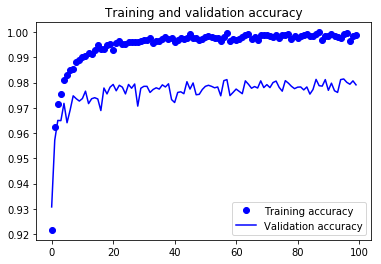

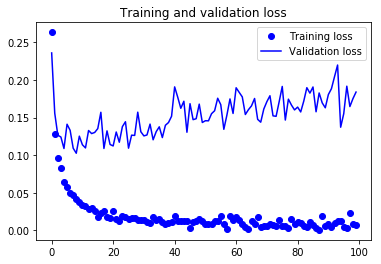

In [49]:
full_model.save_weights('classification_complete.h5')
accuracy = classify_train.history['acc']
val_accuracy = classify_train.history['val_acc']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [50]:
test_eval = full_model.evaluate(X_test, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.17859678938569792
Test accuracy: 0.9791
